# Lab 6: Supervised Learning  

In this lab, we will keep working on supervised learning. We will first learn how to train decision trees and we will see that doing this using `sklearn` is not much different from running kNN algorithm.

## Lab 6.A: Decision Trees

The following code is copied from https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html. You should be able to run the code without error messages.

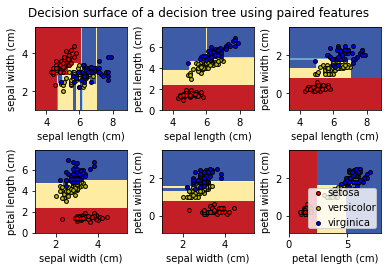

In [240]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

In [241]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    print(pairidx, pair)

0 [0, 1]
1 [0, 2]
2 [0, 3]
3 [1, 2]
4 [1, 3]
5 [2, 3]


**Question 1**. Study the code and try to understand what is happening in each line. Explain what the images plotted by the code show.

**Answer 1**
The images are the decision tree's boundary in accordance to each pair of attributes.

For each image, it has 2 attributes. These 2 attributes are inputs for a decision tree. Each colored block represents the final classification (output) based on the training records of those 2 attributes.

We will examine the first image (of attributes: sepal width, sepal length) as an example . If sepal length is 6 cm and sepal width is 2 cm, then it is classified as versicolor. 

**Question 2**. Train a decision tree on Iris data set using all 4 attributes. Before training, remember to reserve 50 randomly selected examples for test set and train on the remaining 100 examples. Use the default parameter values (no need to put anything in parenthesis in `DecisionTreeClassifier`). How long did it take to train the decision tree? Report the accuracy on the test set. Print the confusion matrix. Report the accuracy on the training set. Discuss if you are seeing any difference and why. Compare the accurracy with the accuracy you got with kNN. Report on the size of the resulting tree (how many nodes are there and what is the depth of the tree). Visualize the tree (consider using `sklearn.tree.export_graphviz`).

In [242]:
# for visualizing and saving the tree
from sklearn import tree

# needed to split dataset into testing and training
from sklearn.model_selection import train_test_split

# for printing the confusion matrix
from sklearn.metrics import confusion_matrix

# for measuring how long the program runs
import time

start = time.time()

# Training all 4 features
X = iris.data
y = iris.target

# Reserve 50 randomly selected datapoints for test set
# Hold the remaining 100 for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50)

# Train
clf = DecisionTreeClassifier().fit(X_train, y_train)

y_hat = clf.predict(X_test)

# Find the Decision Tree's accuracy
accuracy = clf.score(X_test, y_test)

# Visualize and save it to a file
tree.export_graphviz(clf, out_file='tree.dot')

end = time.time()

print("It takes {} seconds to train the decision with all 4 features".format(str(end - start)))
print("The Decision Tree's accuracy is: {}".format(str(accuracy)))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_hat))

It takes 0.007030963897705078 seconds to train the decision with all 4 features
The Decision Tree's accuracy is: 0.92
Confusion Matrix
[[16  0  0]
 [ 0 15  0]
 [ 0  4 15]]


In the submitted tree.png image, the tree has 17 nodes and the depth of 6.

In regards to accuracy, it achieves 98% accuracy which is lower than 100% of some kNN models in lab 5.

Please understand that for kNN models that have 100% accuracy, they have some very specific inputs for training parameters. Please refer to lab 5 for these specific inputs.

The training time is 0.04 seconds.

**Question 3**. Train a decision tree on Iris data, but this time play with the parameters. You can se the detailed list of different choices at http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier. Experiment with `criterion` (default is `gini`, try to train using `entropy`), `max_depth` (try to set it to 2, 3, 4), `min_samples_leaf` (default is 1, try with 5, 15). See if you can find a combination of parameters that improves accuracy on the test set. Report what you found.

In [243]:
criterion_list = ["entropy"]
max_depth_list = [2,3,4]
min_sample_leaf = [1,5,15]
dict_Decision_Tree = {}

for criterion in criterion_list:
    for depth in max_depth_list:
        for leaf in min_sample_leaf:
            # Train
            clf = DecisionTreeClassifier(criterion=criterion,max_depth=depth,min_samples_leaf=leaf).fit(X, y)

            y_hat = clf.predict(X_test)

            # Find the Decision Tree's accuracy
            accuracy = clf.score(X_test, y_test)
            dict_Decision_Tree[(criterion, depth, leaf)] = accuracy
            print(criterion, depth, leaf, accuracy)

entropy 2 1 0.92
entropy 2 5 0.92
entropy 2 15 0.92
entropy 3 1 0.96
entropy 3 5 0.96
entropy 3 15 0.92
entropy 4 1 1.0
entropy 4 5 0.96
entropy 4 15 0.92


I noticed that accuracy for at least 15 sample leafs is the lowest. Maybe, this is related to the common fact that if a tree has too many node, then it is overfitting to that dataset and thus, decreasing the test accuracy.

There is one set of parameters that achieved 100% accuracy. It has entropy as the criterion, 4 as the tree's depth and 1 as the minimum amount of sample leafs.

## Lab 6.B. Doing supervised learning on churn data set

In this part of the lab, you will be using kNN and decision trees on the problem of churn prediction. 

In [244]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# data set is from The Yhat Blog: http://blog.yhat.com/posts/predicting-customer-churn-with-sklearn.html 
churn_df=pd.read_csv("https://raw.githubusercontent.com/CIS3715-temple-2018/CIS3715-temple-2018.github.io/master/churn.csv")
churn_df.head()
full_churn_df = churn_df.copy()

In [245]:
print("Column names: {}".format(churn_df.columns.tolist()))

Column names: ['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']


This is a dataset from a telecom company, of their customers. Based on the recorded attributes of these customers and their calling plans, we want to predict if a customer is likely to leave the company (the last column in the table). This is expensive for the company, as a lost customer means lost monthly revenue.

**Question 4**. Perform EDA on the data set to get an insight into the data, including answering what fraction of customers left the company, what are attributes about, what are their properties, how are attributes and the churn related. Prepare 1-2 page document summarizing the interesting aspects of the data.

In [246]:
churn_df.head(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [247]:
churn_df.dtypes

State             object 
Account Length    int64  
Area Code         int64  
Phone             object 
Int'l Plan        object 
VMail Plan        object 
VMail Message     int64  
Day Mins          float64
Day Calls         int64  
Day Charge        float64
Eve Mins          float64
Eve Calls         int64  
Eve Charge        float64
Night Mins        float64
Night Calls       int64  
Night Charge      float64
Intl Mins         float64
Intl Calls        int64  
Intl Charge       float64
CustServ Calls    int64  
Churn?            object 
dtype: object

In [248]:
churn_df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [249]:
# what is the fraction of the customers that churn
fraction = len(churn_df[churn_df["Churn?"] == "True."]) / churn_df.shape[0]
print(fraction)

0.14491449144914492


According to this dataset, 14% of the examples is of customers that want to leave the service.

In [250]:
# let's take a look at the state attribute
churn_df[churn_df["Churn?"] == "True."]["State"].value_counts()[:10]

TX    18
NJ    18
MD    17
MI    16
MN    15
NY    15
MT    14
MS    14
SC    14
NV    14
Name: State, dtype: int64

We found the top 10 states that have the most churned customers. Now, we will compare those states to top 10 states in the whole dataset.

In [251]:
churn_df["State"].value_counts()[:10]

WV    106
MN    84 
NY    83 
AL    80 
WI    78 
OH    78 
OR    78 
WY    77 
VA    77 
CT    74 
Name: State, dtype: int64

In [252]:
same_state = []
churned = churn_df[churn_df["Churn?"] == "True."]["State"].value_counts()[:10].index.values
whole = churn_df["State"].value_counts()[:10].index.values

for churn in churned:
    for state in whole:
        #print(state == churn)
        if churn == state:
            same_state.append(churn)
print(len(same_state))
print(same_state)

2
['MN', 'NY']


At first I thought that the most represented states in the whole dataset might have the most churned customers but that is not the case.

We see that only the state of Minnesota and New York are in the top 10 of the churned customers and the entire dataset as a whole

In [224]:
# now let's see if there is any drastic fraction between the dataset
# of only churned customers and the whole dataset
# each of these fraction represent a state in the top 10 from the churned dataset

for churn in churned:
    churned_fraction = len(churn_df[churn_df["Churn?"] == "True."][churn_df["State"] == churn]) / churn_df[churn_df["Churn?"] == "True."].shape[0]
    whole_fraction = len(churn_df[churn_df["State"] == churn]) / churn_df.shape[0]
    print(churned_fraction, whole_fraction)
    

0.037267080745341616 0.021602160216021602
0.037267080745341616 0.0204020402040204
0.035196687370600416 0.021002100210021003
0.033126293995859216 0.021902190219021903
0.031055900621118012 0.025202520252025202
0.031055900621118012 0.024902490249024904
0.028985507246376812 0.0204020402040204
0.028985507246376812 0.0195019501950195
0.028985507246376812 0.018001800180018002
0.028985507246376812 0.019801980198019802


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


From my observation, there is no drastic difference in terms of fractions in the top 10 states in churned customers vs. top 10 state in general.

In [225]:
# let's explore the customer service call attribute
churn_df[churn_df["Churn?"] == "True."]["CustServ Calls"].mean()

2.229813664596273

In [226]:
churn_df[churn_df["Churn?"] == "False."]["CustServ Calls"].mean()

1.4498245614035088

We can see that on average, for those that churned, each has about 2.22 customer service calls vs 1.44 for those that stays. 

In [227]:
other_attrs = ["Day Mins","Day Calls","Day Charge","Eve Mins","Eve Calls","Eve Charge","Night Mins","Night Calls","Night Charge","Intl Mins","Intl Calls","Intl Charge"]

for attr in other_attrs:
    print("Attribute: {}".format(attr))
    
    # comparing churned customers vs. customers in the whole dataset
    print("Mean for churned")
    mean_churned = churn_df[churn_df["Churn?"] == "True."][attr].mean()
    print(mean_churned)
    print("Mean for stayed")
    mean_stayed = churn_df[churn_df["Churn?"] == "False."][attr].mean()
    print(mean_stayed)
    print("")

Attribute: Day Mins
Mean for churned
206.91407867494814
Mean for stayed
175.17575438596492

Attribute: Day Calls
Mean for churned
101.33540372670808
Mean for stayed
100.28315789473685

Attribute: Day Charge
Mean for churned
35.17592132505176
Mean for stayed
29.780421052631663

Attribute: Eve Mins
Mean for churned
212.41014492753618
Mean for stayed
199.04329824561412

Attribute: Eve Calls
Mean for churned
100.56107660455487
Mean for stayed
100.03859649122808

Attribute: Eve Charge
Mean for churned
18.054968944099382
Mean for stayed
16.918908771929825

Attribute: Night Mins
Mean for churned
205.2316770186334
Mean for stayed
200.13319298245688

Attribute: Night Calls
Mean for churned
100.39958592132506
Mean for stayed
100.05824561403509

Attribute: Night Charge
Mean for churned
9.235527950310564
Mean for stayed
9.006073684210536

Attribute: Intl Mins
Mean for churned
10.699999999999996
Mean for stayed
10.158877192982445

Attribute: Intl Calls
Mean for churned
4.163561076604555
Mean for st

**Question 5**. Train and test a kNN classifier. First, select 1,000 random customers and save them for testing. You can use the remaining ones for training. Then, you will need to decide what to do with the categorical attributes. The easiest is to simply ignore them, but it would reduce your accuracy. A better way (you have to try it) is to convert the categorical attributes to numbers. It is up to you to decide what distance measure to use, how to pick `k`, and make any other decision that will help you increase the accuracy. For example, it might help you to scale the attributes to the same range. Remember that any transformation you do on the training data needs to be repeated on the test data. Report on the best accuracy you are able to get (please do not forget to split the data into training and test before proceeding). Also report the confusion matrix. Provide a discussion of your choices.

We observe in the dataset that state is the only categorical attribute but the question is do we know any way to convert them into numerical attributes? 

So maybe we can encode each of the state as a number from 1-50.

Since there is no particular order in which we have to organize the state like one must come before the other, we would consider this data as nominal data. Therefore, we can use OneHot Encoding.

https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

In [228]:
# according to this source, Pandas has a built-in function
# that allows OneHot Encoding
# https://stackoverflow.com/questions/44361869/one-hot-encoding-for-states-using-sklearn
# pd.get_dummies(churn_df["State"])

According to this source: https://datascience.stackexchange.com/questions/26713/how-does-knn-handle-categorical-features,

When converting a categorical feature into numerics, we have to consider the question of:

How to assign inter-category distance in a way that makes sense with other features (for example: age-age vs. age-category distance?

kNN does not handle categorical features well so we probably not going to train the model on any categorical attributes, let alone converting it into numerics. 

However, there are some columns that only have 2 categorical value so we will use One Hot Encoding on those columns.

In [229]:
# the only column that has more than 2 categorical values is the State column
# so we are going to drop that column
churn_df = churn_df.drop(columns=['State', 'Phone'])

# apply OneHot Encoding on columns that only have 2 categorical values                  

churn_df.loc[churn_df['Int\'l Plan'] == 'no', 'Int\'l Plan'] = 0
churn_df.loc[churn_df['Int\'l Plan'] == 'yes', 'Int\'l Plan'] = 1

churn_df.loc[churn_df['VMail Plan'] == 'no', 'VMail Plan'] = 0
churn_df.loc[churn_df['VMail Plan'] == 'yes', 'VMail Plan'] = 1
churn_df.dtypes

Account Length    int64  
Area Code         int64  
Int'l Plan        int64  
VMail Plan        int64  
VMail Message     int64  
Day Mins          float64
Day Calls         int64  
Day Charge        float64
Eve Mins          float64
Eve Calls         int64  
Eve Charge        float64
Night Mins        float64
Night Calls       int64  
Night Charge      float64
Intl Mins         float64
Intl Calls        int64  
Intl Charge       float64
CustServ Calls    int64  
Churn?            object 
dtype: object

In [230]:
# splitting into test and training data
y = churn_df["Churn?"]
X = churn_df.drop(columns="Churn?")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000)

In [231]:
from sklearn import neighbors
k = 5
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
yhat = predictor.predict(X_test)
kNN_accuracy = predictor.score(X_test,y_test)

print("The accuracy is {}".format(kNN_accuracy))

# figure out how to get the confusion matrix
#print("Confusion Matrix")
#print(confusion_matrix(y_test,y_hat))

The accuracy is 0.884


**Question 6**. Train and test a decision tree. Do it on the same traing-test split you used in *Question 5*. Your goal is to try to figure out the best way to train an accurate decision tree. Report on your findings. Compare your results with the kNN results.

In [232]:
# Train
clf = DecisionTreeClassifier().fit(X_train, y_train)

y_hat = clf.predict(X_test)

# Find the Decision Tree's accuracy
DT_accuracy = clf.score(X_test, y_test)
print("The accuracy is {}".format(DT_accuracy))

The accuracy is 0.912


It seems like Decision Tree is more accurate than kNN model even with the categorical column dropped. Now let's see how it performs on the full dataset.

An interesting thing when I tried to train with the full dataset is that it got this error:

ValueError: could not convert string to float: 'NV'

**Question 7**. Lets assume you have to use your churn classifier to contact your existing customers and try to prevent churn. The cost of each contact is \\$10. Let us assume each contacted customer will decide to stay. Your profit in keeping a customer is \\$30. Given your best decision tree and kNN classifiers, what is the expected profit on your test data? Can you try to train another classifier that would have even larger profit?

In [233]:
cost_per_contact = 10
profit_per_contact = 30

# We are going to find the expected profit on my test data
# by finding out how many people actually churners on the test data
# multiply that by accuracy percentage then multiply that by 30 - 10
numb_churner = y_test.value_counts()["True."]

# kNN's profit on test data
kNN_profit = kNN_accuracy * numb_churner * (profit_per_contact - cost_per_contact)
print("kNN expected profit is {}".format(kNN_profit))
# Decision Tree's profit on test data
DT_profit = DT_accuracy * numb_churner * (profit_per_contact - cost_per_contact)
print("DT expected profit is {}".format(DT_profit))

kNN expected profit is 2439.84
DT expected profit is 2517.1200000000003


It looks like Decision Tree has a greater expected profit than kNN. I do not know of any other classifier that would create a larger profit than Decision Tree because we have not learned of any more yet.